In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# help(pd.date_range)

In [3]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# freq='Y','M','D','H',"min",'s','Ms'
rng = pd.date_range('1/1/2011', periods=5, freq='Y')
rng

DatetimeIndex(['2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [8]:
rng = pd.date_range('1/1/2011', periods=5, freq='min')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 00:01:00',
               '2011-01-01 00:02:00', '2011-01-01 00:03:00',
               '2011-01-01 00:04:00'],
              dtype='datetime64[ns]', freq='T')

In [12]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
# ts=ts.asfreq('45Min', method='pad')
# ts.resample('D').mean()
ts

2011-01-01 00:00:00    0.571098
2011-01-01 00:01:00   -1.212381
2011-01-01 00:02:00    0.729411
2011-01-01 00:03:00   -1.890615
2011-01-01 00:04:00   -0.464997
Freq: T, dtype: float64

## Operation

In [38]:
# freq='Y','M','D','H',"min",'s','Ms','1D20min'
a=10
index=pd.date_range('1/1/2000', periods=a,freq='Y')
df = pd.DataFrame(np.random.randn(a, 1), index=index, columns=list('A'))
df

,A
2000-12-31,0.631412
2001-12-31,-0.792836
2002-12-31,0.720496
2003-12-31,-0.112769
2004-12-31,-0.070741
2005-12-31,-0.811610
2006-12-31,-1.382116
2007-12-31,-0.604901
2008-12-31,1.281187
2009-12-31,0.243664


In [39]:
df["Datetime"]=df.index 
df

,A,Datetime
2000-12-31,0.631412,2000-12-31
2001-12-31,-0.792836,2001-12-31
2002-12-31,0.720496,2002-12-31
2003-12-31,-0.112769,2003-12-31
2004-12-31,-0.070741,2004-12-31
2005-12-31,-0.811610,2005-12-31
2006-12-31,-1.382116,2006-12-31
2007-12-31,-0.604901,2007-12-31
2008-12-31,1.281187,2008-12-31
2009-12-31,0.243664,2009-12-31


In [40]:
# df.date.map(type)   # in str

In [41]:
df['Datetime'] =  pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df

,A,Datetime
2000-12-31,0.631412,2000-12-31
2001-12-31,-0.792836,2001-12-31
2002-12-31,0.720496,2002-12-31
2003-12-31,-0.112769,2003-12-31
2004-12-31,-0.070741,2004-12-31
2005-12-31,-0.811610,2005-12-31
2006-12-31,-1.382116,2006-12-31
2007-12-31,-0.604901,2007-12-31
2008-12-31,1.281187,2008-12-31
2009-12-31,0.243664,2009-12-31


In [42]:
# df.date.map(type)   # in pd timestamp

In [43]:
# help(pd.DatetimeIndex)

In [ ]:
# year,month,day,hour,minute,second,microsecond,nanosecond,date,time,timetz
# dayofyear,day_of_year,weekofyear,week,dayofweek,day_of_week

In [44]:
df['day'] =  pd.DatetimeIndex(df['Datetime']).day
df['month'] =  pd.DatetimeIndex(df['Datetime']).month
df['year'] =  pd.DatetimeIndex(df['Datetime']).year
df['date'] =  pd.DatetimeIndex(df['Datetime']).date

df['date_'] = pd.to_datetime(df[['year','month','day']])

df['hour'] =  pd.DatetimeIndex(df['Datetime']).hour
df['min'] =  pd.DatetimeIndex(df['Datetime']).minute
df['sec'] =  pd.DatetimeIndex(df['Datetime']).second
df['millsec'] =  pd.DatetimeIndex(df['Datetime']).microsecond
df

,A,Datetime,day,month,year,date,date_,hour,min,sec,millsec
2000-12-31,0.631412,2000-12-31,31,12,2000,2000-12-31,2000-12-31,0,0,0,0
2001-12-31,-0.792836,2001-12-31,31,12,2001,2001-12-31,2001-12-31,0,0,0,0
2002-12-31,0.720496,2002-12-31,31,12,2002,2002-12-31,2002-12-31,0,0,0,0
2003-12-31,-0.112769,2003-12-31,31,12,2003,2003-12-31,2003-12-31,0,0,0,0
2004-12-31,-0.070741,2004-12-31,31,12,2004,2004-12-31,2004-12-31,0,0,0,0
2005-12-31,-0.811610,2005-12-31,31,12,2005,2005-12-31,2005-12-31,0,0,0,0
2006-12-31,-1.382116,2006-12-31,31,12,2006,2006-12-31,2006-12-31,0,0,0,0
2007-12-31,-0.604901,2007-12-31,31,12,2007,2007-12-31,2007-12-31,0,0,0,0
2008-12-31,1.281187,2008-12-31,31,12,2008,2008-12-31,2008-12-31,0,0,0,0
2009-12-31,0.243664,2009-12-31,31,12,2009,2009-12-31,2009-12-31,0,0,0,0


In [75]:
df['month_p']=pd.PeriodIndex(df['Datetime'], dtype='period[m]', freq='m')
df

,A,Datetime,day,month,year,date,date_,hour,min,sec,millsec,month_p
2000-12-31,0.631412,2000-12-31,31,12,2000,2000-12-31,2000-12-31,0,0,0,0,2000-12
2001-12-31,-0.792836,2001-12-31,31,12,2001,2001-12-31,2001-12-31,0,0,0,0,2001-12
2002-12-31,0.720496,2002-12-31,31,12,2002,2002-12-31,2002-12-31,0,0,0,0,2002-12
2003-12-31,-0.112769,2003-12-31,31,12,2003,2003-12-31,2003-12-31,0,0,0,0,2003-12
2004-12-31,-0.070741,2004-12-31,31,12,2004,2004-12-31,2004-12-31,0,0,0,0,2004-12
2005-12-31,-0.811610,2005-12-31,31,12,2005,2005-12-31,2005-12-31,0,0,0,0,2005-12
2006-12-31,-1.382116,2006-12-31,31,12,2006,2006-12-31,2006-12-31,0,0,0,0,2006-12
2007-12-31,-0.604901,2007-12-31,31,12,2007,2007-12-31,2007-12-31,0,0,0,0,2007-12
2008-12-31,1.281187,2008-12-31,31,12,2008,2008-12-31,2008-12-31,0,0,0,0,2008-12
2009-12-31,0.243664,2009-12-31,31,12,2009,2009-12-31,2009-12-31,0,0,0,0,2009-12


## Datetime Differ

**Exp**

In [48]:
df = pd.DataFrame(columns=["one", "two"])
df.one = ["2019-01-24","2019-01-27"]
df.one = pd.to_datetime(df.one)
df.two = ["2019-01-28", "2020-01-29"]
df.two = pd.to_datetime(df.two)
df

,one,two
0,2019-01-24,2019-01-28
1,2019-01-27,2020-01-29


In [51]:
df['diff_one_two'] = (df.two - df.one)
df

,one,two,diff_one_two
0,2019-01-24,2019-01-28,4 days
1,2019-01-27,2020-01-29,367 days


In [49]:
a='2014-01-24 13:03:12.050000'
b=pd.Timestamp(a)

In [69]:
# id or Value Both check
a=[5,6,7]
b=[5,6,7]
b==a

True

In [70]:
id(a)

2034229920008

In [71]:
id(b)

2034229904840

In [50]:
b==a

False

In [47]:
5=="5"

False

**Exp**

In [67]:
data = {'todate': [pd.Timestamp('2014-01-24 13:03:12.050000'), pd.Timestamp('2014-01-27 11:57:18.240000'), pd.Timestamp('2014-01-23 10:07:47.660000')],
        'fromdate': [pd.Timestamp('2014-01-26 23:41:21.870000'), pd.Timestamp('2014-01-27 15:38:22.540000'), pd.Timestamp('2014-01-23 18:50:41.420000')]}
df = pd.DataFrame(data)
df

,todate,fromdate
0,2014-01-24 13:03:12.050,2014-01-26 23:41:21.870
1,2014-01-27 11:57:18.240,2014-01-27 15:38:22.540
2,2014-01-23 10:07:47.660,2014-01-23 18:50:41.420


In [69]:
df['diff'] = df['fromdate'] - df['todate']
df

,todate,fromdate,diff
0,2014-01-24 13:03:12.050,2014-01-26 23:41:21.870,2 days 10:38:09.820000
1,2014-01-27 11:57:18.240,2014-01-27 15:38:22.540,0 days 03:41:04.300000
2,2014-01-23 10:07:47.660,2014-01-23 18:50:41.420,0 days 08:42:53.760000


**Exp**

In [70]:
i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09 00:00:00,1
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3
2018-04-12 01:00:00,4


In [72]:
ts.between_time('0:15', '0:45')

,A
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3


**Exp**

In [31]:
air_quality = pd.read_csv("_dataset/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [33]:
np.dtype(air_quality["datetime"])

dtype('O')

In [35]:
air_quality.datetime.map(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
2063    <class 'str'>
2064    <class 'str'>
2065    <class 'str'>
2066    <class 'str'>
2067    <class 'str'>
Name: datetime, Length: 2068, dtype: object

In [36]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [37]:
air_quality.datetime.map(type)

0       <class 'pandas._libs.tslibs.timestamps.Timesta...
1       <class 'pandas._libs.tslibs.timestamps.Timesta...
2       <class 'pandas._libs.tslibs.timestamps.Timesta...
3       <class 'pandas._libs.tslibs.timestamps.Timesta...
4       <class 'pandas._libs.tslibs.timestamps.Timesta...
                              ...                        
2063    <class 'pandas._libs.tslibs.timestamps.Timesta...
2064    <class 'pandas._libs.tslibs.timestamps.Timesta...
2065    <class 'pandas._libs.tslibs.timestamps.Timesta...
2066    <class 'pandas._libs.tslibs.timestamps.Timesta...
2067    <class 'pandas._libs.tslibs.timestamps.Timesta...
Name: datetime, Length: 2068, dtype: object

In [79]:
air_quality["datetime"].head()

0   2019-06-21 00:00:00+00:00
1   2019-06-20 23:00:00+00:00
2   2019-06-20 22:00:00+00:00
3   2019-06-20 21:00:00+00:00
4   2019-06-20 20:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]

In [80]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [82]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


In [83]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

<AxesSubplot:xlabel='datetime'>

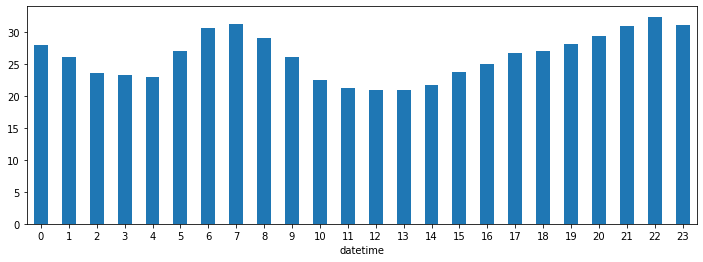

In [85]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot( kind='bar', rot=0, ax=axs )